## Business Case:
Analyse  historical stock market data table for the S&P 500 index (^GSPC) from December 30, 1927, to current date

In [68]:
#Import Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Load Dataset
df=pd.read_csv('all_indices_data.csv')

In [70]:
df.head()

,date,open,high,low,close,volume,ticker
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0.0,^GSPC
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0.0,^GSPC
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0.0,^GSPC
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC


In [71]:
df.shape

(283943, 7)

In [72]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume    float64
ticker     object
dtype: object

In [73]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64

In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283943 entries, 0 to 283942
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    283943 non-null  object 
 1   open    283943 non-null  float64
 2   high    283943 non-null  float64
 3   low     283943 non-null  float64
 4   close   283943 non-null  float64
 5   volume  283943 non-null  float64
 6   ticker  283943 non-null  object 
dtypes: float64(5), object(2)
memory usage: 15.2+ MB
None


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,283943.0,7.028656e+03,1.447705e+04,0.0,1075.934998,2.981870e+03,7.012990e+03,5.631247e+05
high,283943.0,7.083216e+03,1.465936e+04,4.4,1081.880005,3.000490e+03,7.049780e+03,5.833879e+05
low,283943.0,6.976307e+03,1.433828e+04,4.4,1069.594971,2.960820e+03,6.968551e+03,5.631247e+05
close,283943.0,7.031767e+03,1.451519e+04,4.4,1075.900024,2.981540e+03,7.012034e+03,5.823230e+05
volume,283943.0,3.725241e+08,9.837609e+08,0.0,0.000000,1.117900e+06,1.557950e+08,1.162119e+10


In [76]:
#Insight

In [77]:
#Data Cleaning and Preprocessing:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [78]:
# Check for missing values
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64


In [79]:
# Drop duplicates
df.drop_duplicates(subset='date', inplace=True)

# Data Visualization:

In [20]:
!pip install mpl_finance

In [80]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [22]:
!pip install mplfinance

                                              0.0/75.0 kB ? eta -:--:--
                                              0.0/75.0 kB ? eta -:--:--
                                              0.0/75.0 kB ? eta -:--:--
                                              0.0/75.0 kB ? eta -:--:--
     -----                                    10.2/75.0 kB ? eta -:--:--
     -----                                    10.2/75.0 kB ? eta -:--:--
     -----                                    10.2/75.0 kB ? eta -:--:--
     -----                                    10.2/75.0 kB ? eta -:--:--
     -----                                    10.2/75.0 kB ? eta -:--:--
     ---------------                         30.7/75.0 kB 72.6 kB/s eta 0:00:01
     ---------------                         30.7/75.0 kB 72.6 kB/s eta 0:00:01
     ---------------                         30.7/75.0 kB 72.6 kB/s eta 0:00:01
     ---------------                         30.7/75.0 kB 72.6 kB/s eta 0:00:01
     ---------------       

In [81]:
import mplfinance.original_flavor as mpf  # Importing the correct module
from matplotlib.dates import date2num

In [82]:
# Convert dates to a format compatible with date2num
df['date_num'] = df['date'].apply(date2num)

In [83]:
# Select relevant columns for the candlestick chart
ohlc = df[['date_num', 'open', 'high', 'low', 'close']]

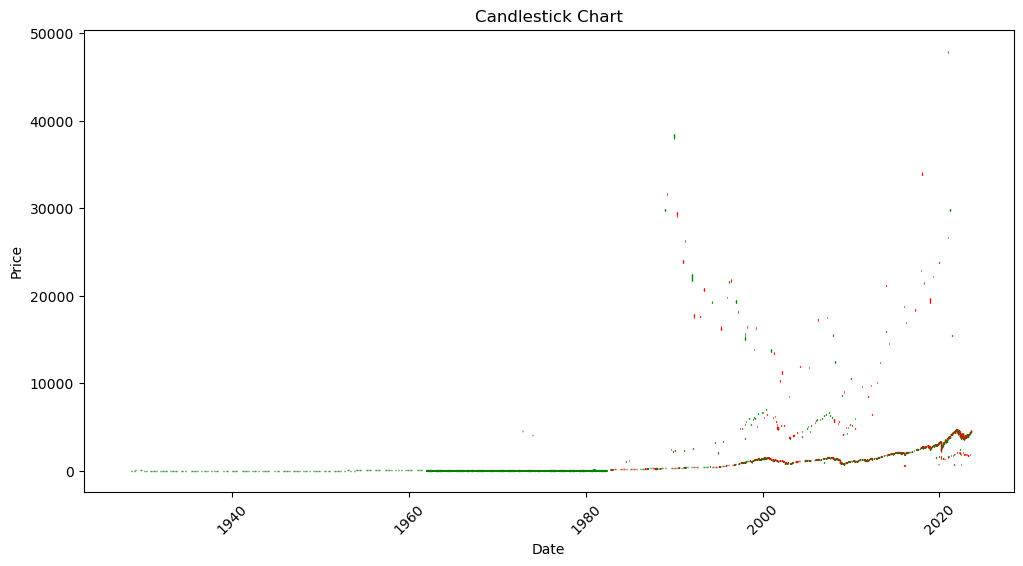

In [84]:
# Create a custom candlestick plot using mplfinance
fig, ax = plt.subplots(figsize=(12, 6))
mpf.candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()  # Display dates on the x-axis
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Candlestick Chart')
plt.xticks(rotation=45)
plt.show()

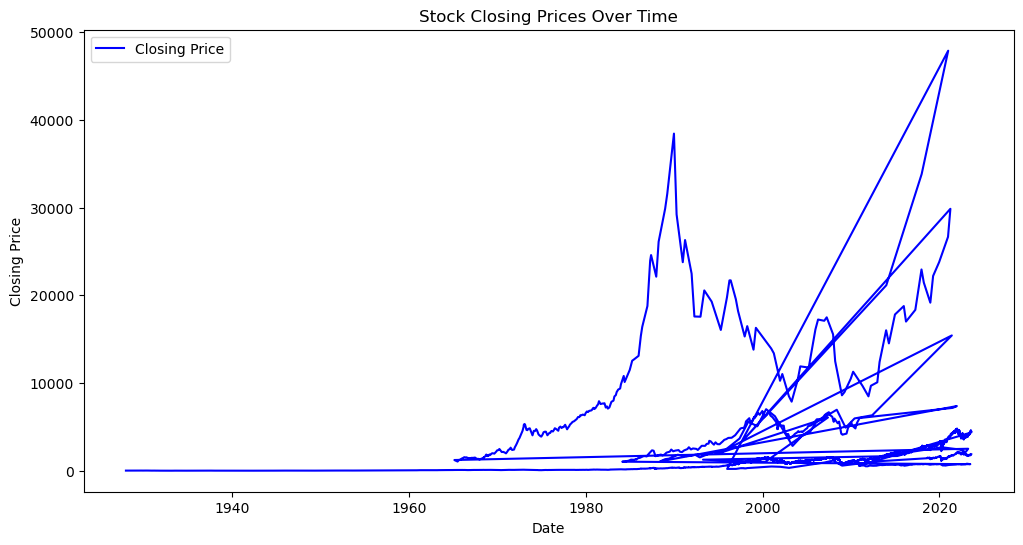

In [30]:
##Visualize the stock's historical prices using line plots and candlestick charts.
# Line plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()

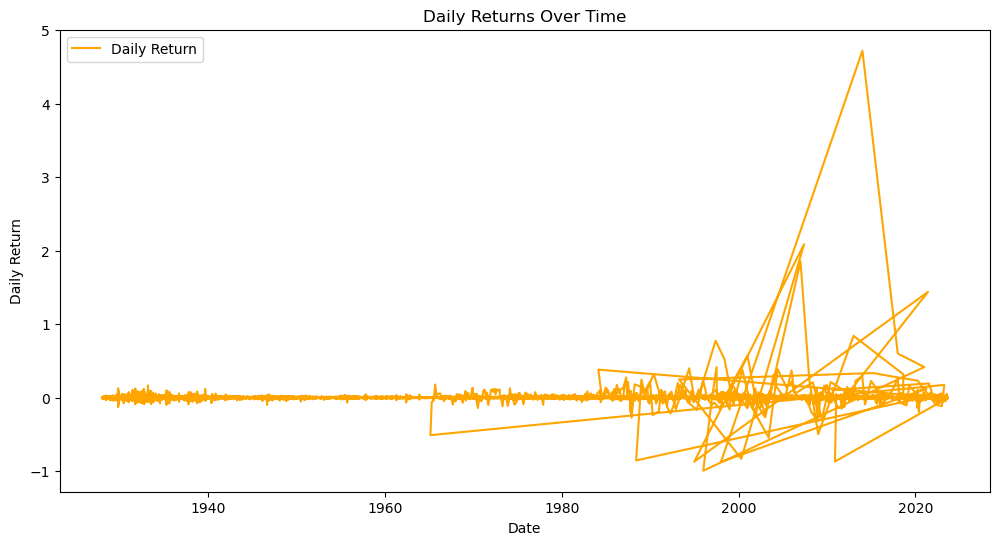

In [31]:
##Calculating Returns and Trends:

#Calculate daily returns
df['daily_return'] = df['close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['daily_return'], label='Daily Return', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.legend()
plt.show()

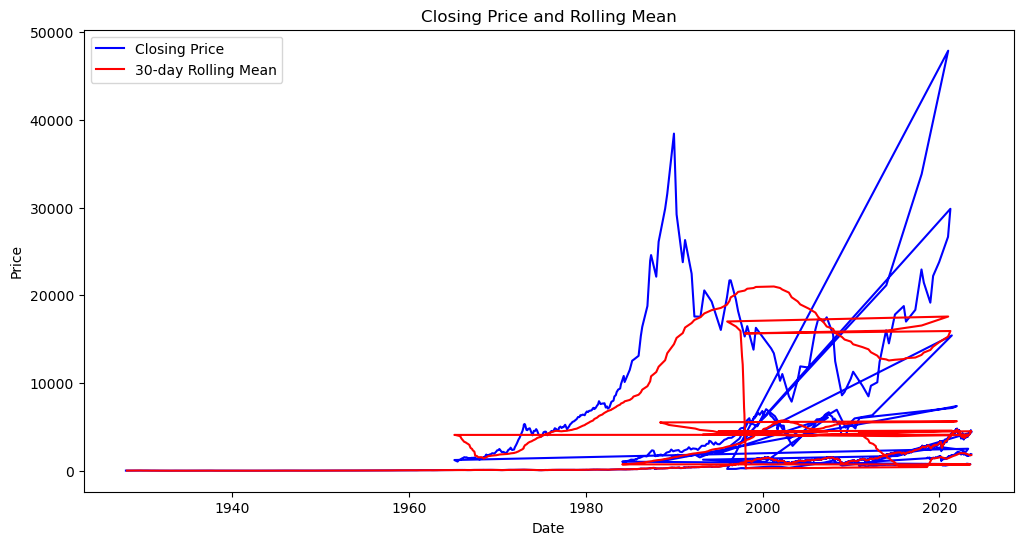

In [32]:
# Calculate rolling mean and visualize trend
df['rolling_mean'] = df['close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')
plt.plot(df['date'], df['rolling_mean'], label='30-day Rolling Mean', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and Rolling Mean')
plt.legend()
plt.show()

In [33]:
##Market Sentiment Analysis:
###Analyze market sentiment by comparing the close price with the previous day's close.

df['price_change'] = df['close'].diff()
df['sentiment'] = df['price_change'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

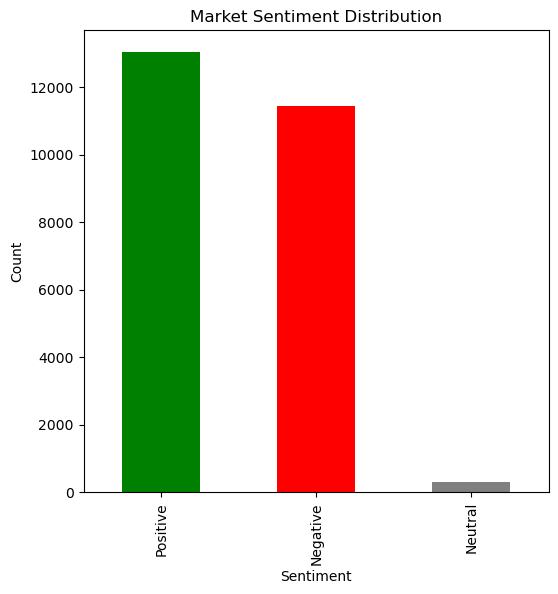

In [35]:
# Plot sentiment distribution
plt.figure(figsize=(6, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Market Sentiment Distribution')
plt.show()

# Volatility Analysis:
Volatility is a measure of how much a stock's price fluctuates. A common measure of volatility is the standard deviation of the stock's returns.

In [103]:
df['date'] = pd.to_datetime(df['date'])

In [104]:
# Calculate daily returns
df['daily_return'] = df['close'].pct_change()

In [105]:
# Calculate volatility as the rolling standard deviation of returns
window = 20  # Adjust the window size as needed
df['volatility'] = df['daily_return'].rolling(window=window).std()

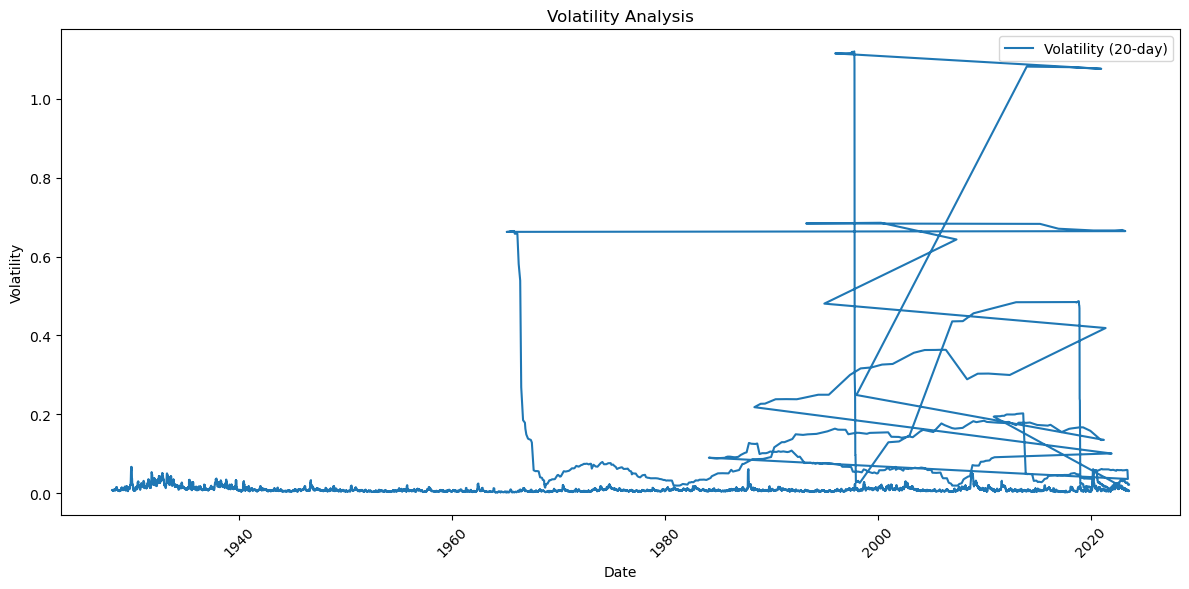

In [106]:
# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volatility'], label=f'Volatility ({window}-day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Moving Average Crossovers:
Moving average crossovers are used to identify trends and potential buy/sell signals. A common strategy is using a short-term moving average (e.g., 50-day) and a long-term moving average (e.g., 200-day). 

In [107]:
# Calculate moving averages
short_window = 50  # Short-term moving average
long_window = 200  # Long-term moving average
df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()

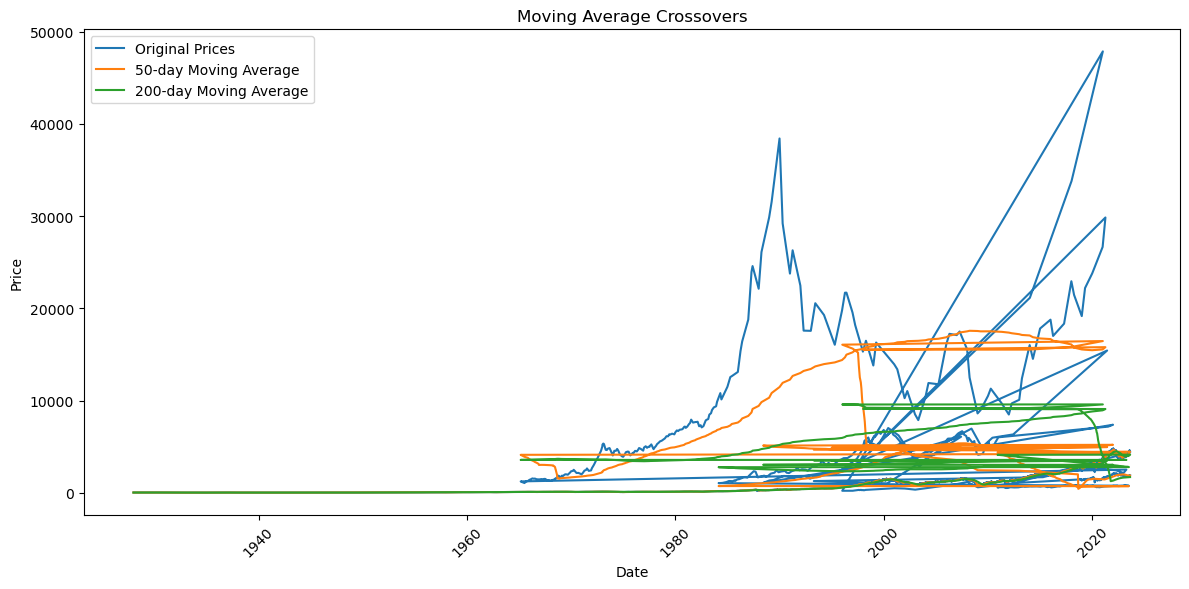

In [108]:
# Plot the moving averages and the original prices
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Original Prices')
plt.plot(df['date'], df['short_mavg'], label=f'{short_window}-day Moving Average')
plt.plot(df['date'], df['long_mavg'], label=f'{long_window}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossovers')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Time Series Plot:

In [110]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)  # Set the date as the index

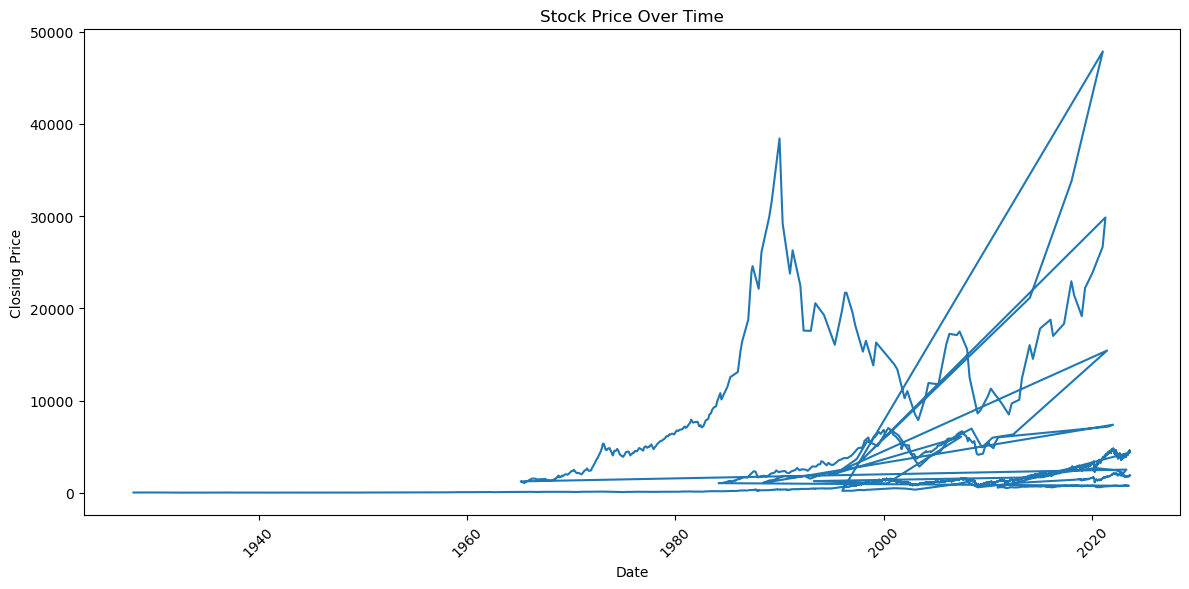

In [111]:
# Plot the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(df['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [89]:
df.dtypes

date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
volume                 float64
ticker                  object
date_num               float64
daily_return           float64
dtype: object

In [112]:
df.head()

,open,high,low,close,volume,ticker,date_num,daily_return,volatility,short_mavg,long_mavg
date,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC,-15343.0,NaN,NaN,17.660000,17.660000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0.0,^GSPC,-15339.0,0.005663,NaN,17.710000,17.710000
1928-01-04,17.719999,17.719999,17.719999,17.719999,0.0,^GSPC,-15338.0,-0.002252,NaN,17.713333,17.713333
1928-01-05,17.549999,17.549999,17.549999,17.549999,0.0,^GSPC,-15337.0,-0.009594,NaN,17.672500,17.672500
1928-01-06,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC,-15336.0,0.006268,NaN,17.670000,17.670000


In [52]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ticker', 'date_num',
       'daily_return', 'rolling_mean', 'price_change', 'sentiment',
       'volatility', 'short_mavg', 'long_mavg'],
      dtype='object')

# Plotting the autocorrelation function


In [114]:
df.shape

(24795, 11)

In [113]:
df.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
ticker           0
date_num         0
daily_return     1
volatility      20
short_mavg       0
long_mavg        0
dtype: int64

In [115]:
# Forward-fill missing 'daily_return' values
df['daily_return'].fillna(method='ffill', inplace=True)

In [116]:
# Fill missing 'volatility' values with the mean
mean_volatility = df['volatility'].mean()
df['volatility'].fillna(mean_volatility, inplace=True)

In [117]:
df.head()

,open,high,low,close,volume,ticker,date_num,daily_return,volatility,short_mavg,long_mavg
date,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC,-15343.0,NaN,0.013354,17.660000,17.660000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0.0,^GSPC,-15339.0,0.005663,0.013354,17.710000,17.710000
1928-01-04,17.719999,17.719999,17.719999,17.719999,0.0,^GSPC,-15338.0,-0.002252,0.013354,17.713333,17.713333
1928-01-05,17.549999,17.549999,17.549999,17.549999,0.0,^GSPC,-15337.0,-0.009594,0.013354,17.672500,17.672500
1928-01-06,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC,-15336.0,0.006268,0.013354,17.670000,17.670000


In [90]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x600 with 0 Axes>

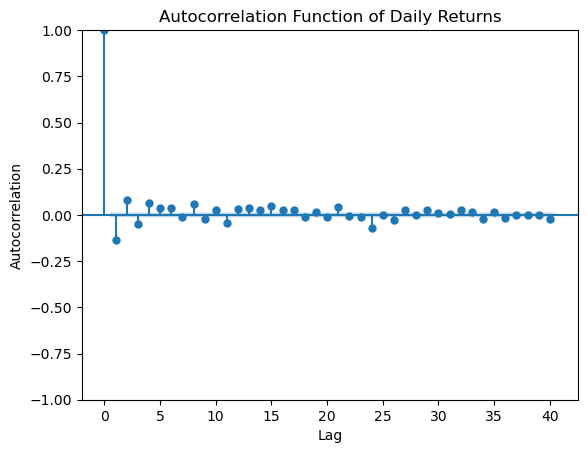

In [91]:
# Plot the autocorrelation function for the 'daily_return' column
plt.figure(figsize=(10, 6))
plot_acf(df['daily_return'].dropna(), lags=40)  # Drop NaN values and adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Daily Returns')
plt.show()

In [93]:
# ADfuller Test to check stationarity
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'daily_return' column
result = adfuller(df['daily_return'].dropna())

In [94]:
# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("P-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")
    
# Check if the time series is stationary or not
if p_value <= 0.05:
    print("The time series is likely stationary (reject the null hypothesis)")
else:
    print("The time series is likely non-stationary (fail to reject the null hypothesis)")


ADF Statistic: -15.665143170607992
P-value: 1.536809745767384e-28
Critical Values:
1%: -3.4306142949480294
5%: -2.8616568103120095
10%: -2.566832174722889
The time series is likely stationary (reject the null hypothesis)


Based on the ADF test results, the p-value is significantly lower than the common significance level of 0.05. This indicates that we can reject the null hypothesis, and the time series is likely stationary.

The ADF statistic value of -15.665 suggests that the observed data has a strong indication of being stationary. Additionally, the critical values are more negative than the ADF statistic, further supporting the conclusion of stationarity.

Remember that the results of the ADF test, such as the p-value and critical values, are used to make a statistical inference about the stationarity of the time series. In this case, with such a low p-value, you can reasonably conclude that the 'daily_return' time series is stationary.

In [95]:
# Define the proportion of data for the test set (e.g., 20%)
test_set_proportion = 0.2

# Calculate the number of data points for the test set
num_test_points = int(len(df) * test_set_proportion)

# Split the data into training and test sets
train_set = df[:-num_test_points]
test_set = df[-num_test_points:]

# Print the shapes of the resulting sets
print("Training set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Training set shape: (19836, 9)
Test set shape: (4959, 9)


In [118]:
##autoregressive model 
from statsmodels.tsa.api import AutoReg
import matplotlib.pyplot as plt

In [119]:
# Select columns for the target, exogenous variables, and lags
target_column = 'daily_return'
exog_columns = ['volatility', 'short_mavg', 'long_mavg']
lag_order = 1

In [120]:
# Fill missing 'volatility' values with the mean or median
mean_volatility = df['volatility'].mean()
df['volatility'].fillna(mean_volatility, inplace=True)

In [121]:
# Interpolate missing 'daily_return' values
df[target_column].interpolate(method='linear', inplace=True)

In [122]:
# Drop any remaining rows with missing values
df.dropna(subset=[target_column], inplace=True)

In [123]:
# Select columns for target and exogenous variables
target = df[target_column]
exog = df[exog_columns]

In [124]:
# Instantiate the AutoReg model
model = AutoReg(target, lags=lag_order, exog=exog)

In [125]:
# Fit the model
fitted_model = model.fit()

In [126]:
# Make predictions on the training set (in-sample predictions)
train_predictions = fitted_model.predict(start=lag_order, end=len(target) - 1, exog=exog)

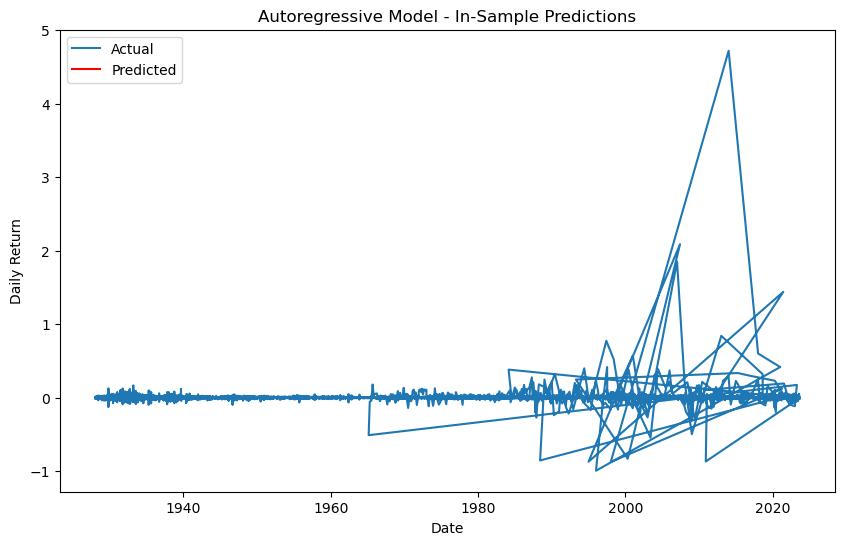

In [127]:
# Plot the actual values and the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[target_column], label='Actual')
plt.plot(df.index[lag_order:], train_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Autoregressive Model - In-Sample Predictions')
plt.legend()
plt.show()

In [141]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [142]:
# Select the target column for the time series analysis
target_column = 'daily_return'

In [143]:
# Check for stationarity using ADF test
adf_result = adfuller(df[target_column].dropna())
print("ADF Test p-value:", adf_result[1])

ADF Test p-value: 1.536809745767384e-28


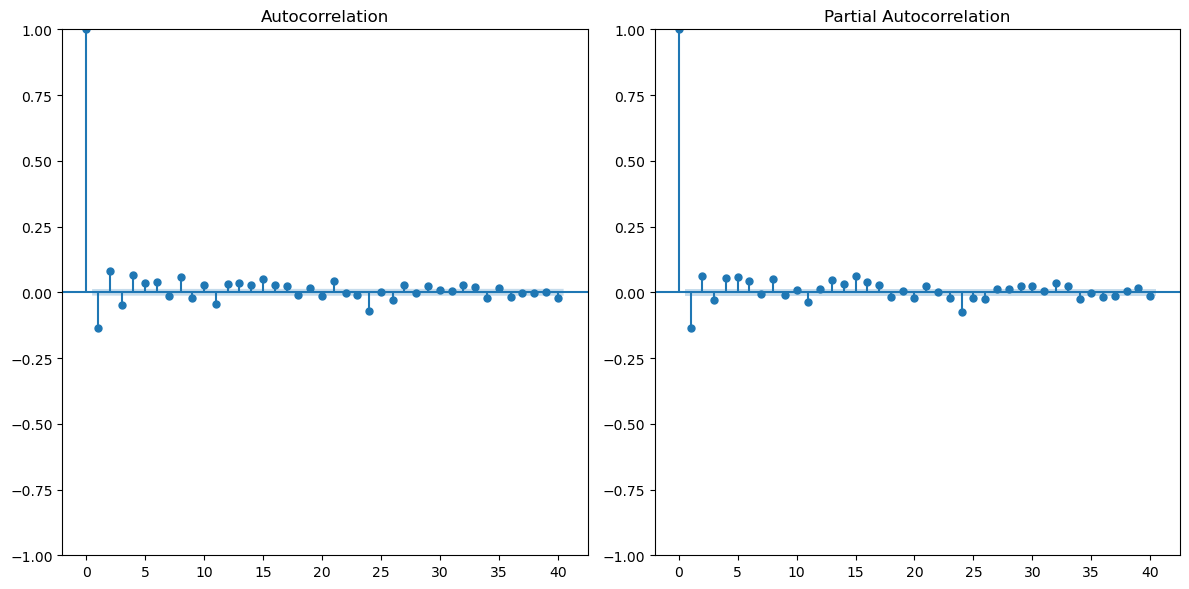

In [144]:
# Plot ACF and PACF to determine AR and MA orders
plt.figure(figsize=(12, 6))
plot_acf(df[target_column].dropna(), lags=40, ax=plt.subplot(121))
plot_pacf(df[target_column].dropna(), lags=40, ax=plt.subplot(122))
plt.tight_layout()
plt.show()

In [145]:
# If the ADF test p-value is greater than 0.05, you might need to apply differencing
# Set your significance level for ADF test
alpha = 0.05

if adf_result[1] > alpha:
    print("Applying differencing...")
    differenced_series = df['target_column'].diff().dropna()

    # Check for stationarity again
    adf_result_diff = adfuller(differenced_series)
    print("ADF Test p-value (after differencing):", adf_result_diff[1])

    # Plot ACF and PACF for the differenced series
    plt.figure(figsize=(12, 6))
    plot_acf(differenced_series, lags=40, ax=plt.subplot(121))
    plot_pacf(differenced_series, lags=40, ax=plt.subplot(122))
    plt.tight_layout()
    plt.show()

    # Fit an ARIMA model
    p = 1  # AR order
    d = 1  # Differencing order
    q = 1  # MA order

    model = ARIMA(df['target_column'], order=(p, d, q))
    fitted_model = model.fit(disp=-1)  # disp controls the display of convergence information

    # Print model summary
    print(fitted_model.summary())

    # Plot the original time series and the predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(df['target_column'], label='Original')
    plt.plot(fitted_model.fittedvalues, color='red', label='Fitted')
    plt.legend()
    plt.title('ARIMA Model')
    plt.show()
else:
    print("Data is stationary. No differencing needed.")

Data is stationary. No differencing needed.


In [149]:
from statsmodels.tsa.arima.model import ARIMA

In [150]:
# Fit an ARIMA model
p = 1  # AR order
d = 0  # No differencing needed since the data is stationary
q = 1  # MA order

target_column_name = 'daily_return'  # Replace with your actual column name

model = ARIMA(df[target_column_name], order=(p, d, q))
fitted_model = model.fit()

                               SARIMAX Results                                
Dep. Variable:           daily_return   No. Observations:                24794
Model:                 ARIMA(1, 0, 1)   Log Likelihood               42408.947
Date:                Thu, 31 Aug 2023   AIC                         -84809.895
Time:                        15:42:57   BIC                         -84777.421
Sample:                             0   HQIC                        -84799.380
                              - 24794                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.599      0.009       0.000       0.002
ar.L1         -0.5860      0.003   -224.361      0.000      -0.591      -0.581
ma.L1          0.4594      0.003    167.681      0.0

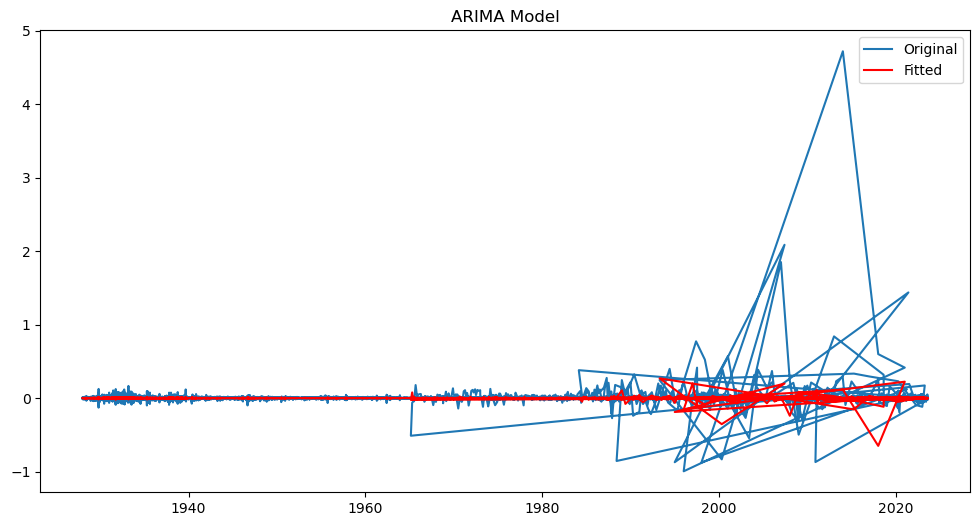

In [151]:
# Print model summary
print(fitted_model.summary())

# Plot the original time series and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df[target_column_name], label='Original')
plt.plot(fitted_model.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('ARIMA Model')
plt.show()

The output above is the  summary of a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) model for a time series of daily returns. Let's break down the important components of this output:

1. Model Specification:
   Model Type: The SARIMAX model being used here is specified as ARIMA(1, 0, 1). This means that it's a non-seasonal ARMA (AutoRegressive Moving Average) model with one autoregressive term (ARIMA) and one moving average term (MA).

2. Dataset Information:
   Number of Observations: There are 24,794 observations in the dataset.
   Date and Time: The model was run on August 31, 2023, at 15:42:57.

3. Log Likelihood and Information Criteria:
   - Log Likelihood: The log-likelihood value is a measure of how well the model fits the data. A higher log likelihood is          better, and in this case, it is 42,408.947.
   - AIC, BIC, HQIC: These are information criteria used to compare models. Lower values indicate a better fit. In this case,        AIC is -84,809.895, BIC is -84,777.421, and HQIC is -84,799.380.
   
4.  Model Coefficients:
    const: The constant or intercept term in the model is approximately 0.0010.
    ar.L1: The autoregressive coefficient for lag 1 is approximately -0.5860.
    ma.L1: The moving average coefficient for lag 1 is approximately 0.4594.
    sigma2: The variance of the white noise or error term is approximately 0.0019.

5. Diagnostic Tests:

    - Ljung-Box (Q) Test: This is a test for the presence of autocorrelation in the model residuals. A small Q-value (0.04) and       a high p-value (0.84) suggest that there is no significant autocorrelation in the residuals.
    
     - Jarque-Bera (JB) Test: This is a test for normality of the residuals. The extremely high JB statistic (approximately          29,470,803,431.66) and a p-value close to 0 indicate that the residuals are not normally distributed.
     
    - Heteroskedasticity (H) Test: This tests for the presence of heteroskedasticity (non-constant variance) in the residuals.      A high H-statistic (25.01) and a p-value close to 0 suggest the presence of heteroskedasticity.
    
    - Skew and Kurtosis: The skewness (55.03) and kurtosis (5342.94) values indicate that the residuals are highly skewed and         exhibit extremely heavy tails.
    
##Insights:

 - The model appears to fit the data well based on the log likelihood and information criteria values (AIC, BIC, HQIC).
 - The model coefficients provide information about the autoregressive and moving average components of the model.
 - The Ljung-Box test suggests that there is no significant autocorrelation in the residuals.
 - However, the Jarque-Bera test indicates that the residuals are far from normally distributed, and the heteroskedasticity        test suggests non-constant variance in the residuals.
 - The extremely high skewness and kurtosis values in the residuals indicate that the model may not capture the data's            distribution adequately.
 
In summary, while the model fits the data well in terms of likelihood and information criteria, there are significant issues with the distribution of residuals, indicating that this model may not be suitable for making accurate predictions or inferences about the data. Further model refinement or exploration of the data may be necessary to address these issues.